<a href="https://colab.research.google.com/github/shubhamraut0209/Data-Analyst-Internship-Projects/blob/main/COVID_19_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:** COVID-19 Data Analysis

**Objective:** Analyze COVID-19 global data to uncover trends in infection rates, testing, and government responses. The goal is to extract meaningful insights to guide public health strategies and pandemic preparedness.

# **Step 1: Data Loading**

In [18]:
import pandas as pd

# Load datasets
day_wise_df = pd.read_csv("/content/day_wise.csv")
country_wise_df = pd.read_csv("/content/country_wise_latest.csv")
worldometer_df = pd.read_csv("/content/worldometer_data.csv")

# **Step 2: Data Preprocessing**

In [19]:
# ----- Preprocess day_wise_df -----
day_wise_df['Date'] = pd.to_datetime(day_wise_df['Date'])  # Convert Date column to datetime
day_wise_df.fillna(0, inplace=True)  # Fill missing values with 0

# ----- Preprocess country_wise_df -----
country_wise_df.fillna(0, inplace=True)

# ----- Preprocess worldometer_df -----
worldometer_df.replace('N/A', 0, inplace=True)  # Replace 'N/A' with 0
worldometer_df.fillna(0, inplace=True)

# Convert numeric columns
cols_to_numeric = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
                   'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
                   'TotalTests', 'Tests/1M pop', 'Population']
for col in cols_to_numeric:
    worldometer_df[col] = pd.to_numeric(worldometer_df[col], errors='coerce')

worldometer_df.fillna(0, inplace=True)

In [20]:
print(day_wise_df.head())

        Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0 2020-01-22        555      17         28     510          0           0   
1 2020-01-23        654      18         30     606         99           1   
2 2020-01-24        941      26         36     879        287           8   
3 2020-01-25       1434      42         39    1353        493          16   
4 2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   

In [21]:
print(country_wise_df.head())

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [22]:
print(worldometer_df.head())

  Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       0.0   
1         Brazil  South America  2.127107e+08     2917562       0.0   
2          India           Asia  1.381345e+09     2025409       0.0   
3         Russia         Europe  1.459409e+08      871894       0.0   
4   South Africa         Africa  5.938157e+07      538184       0.0   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        0.0       2576668.0           0.0    2292707.0   
1      98644.0        0.0       2047660.0           0.0     771258.0   
2      41638.0        0.0       1377384.0           0.0     606387.0   
3      14606.0        0.0        676357.0           0.0     180931.0   
4       9604.0        0.0        387316.0           0.0     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1   

# **Step 3: Exploratory Data Analysis (EDA)**

**✅ Step 3.1: Global Daily Growth Trends**

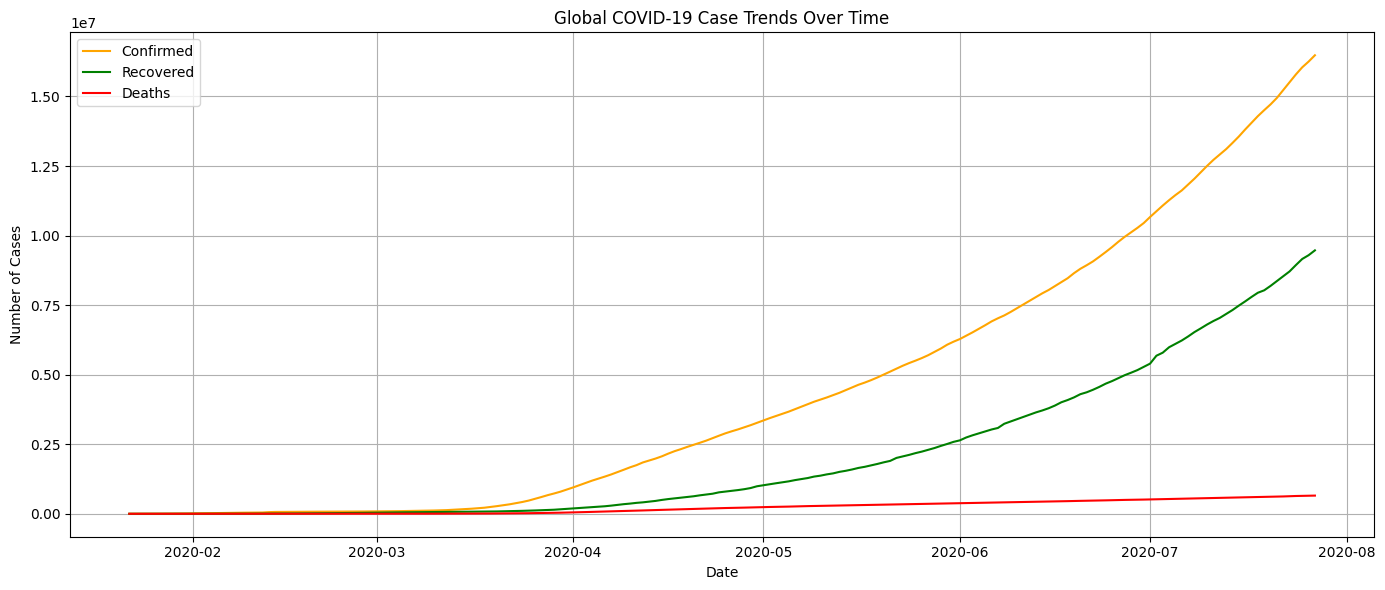

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot global trends
plt.figure(figsize=(14, 6))
plt.plot(day_wise_df['Date'], day_wise_df['Confirmed'], label='Confirmed', color='orange')
plt.plot(day_wise_df['Date'], day_wise_df['Recovered'], label='Recovered', color='green')
plt.plot(day_wise_df['Date'], day_wise_df['Deaths'], label='Deaths', color='red')
plt.title('Global COVID-19 Case Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**✅ Step 3.2: Top 10 Countries by Total Confirmed Cases**

<ipython-input-24-e47bad32ac29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette='rocket')


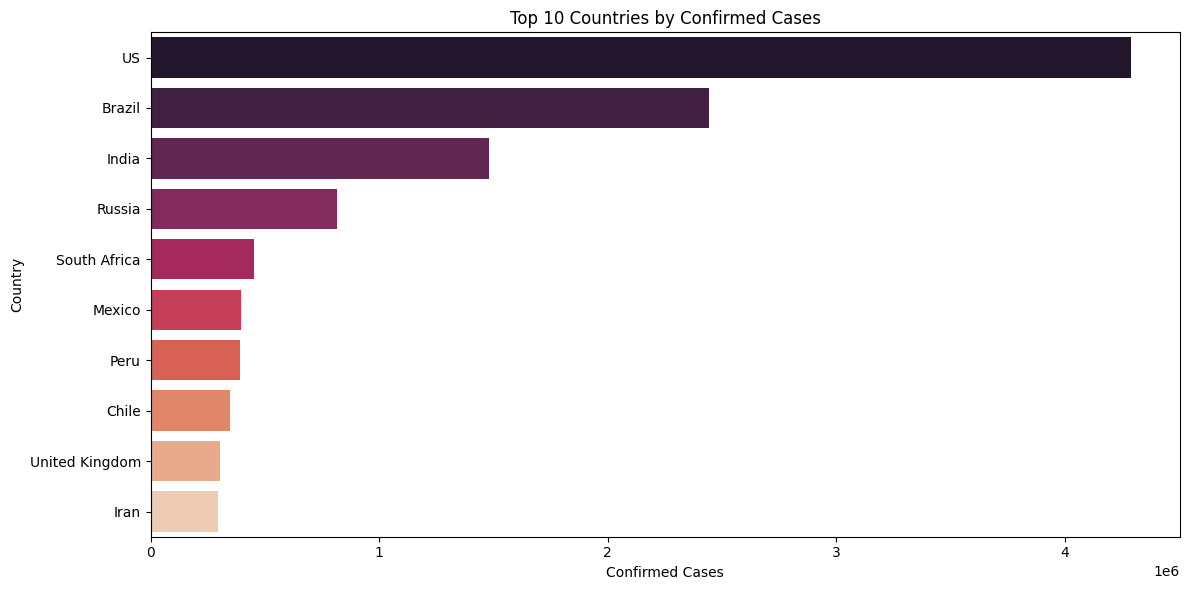

In [24]:
# Sort by confirmed cases
top_10_countries = country_wise_df.sort_values('Confirmed', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette='rocket')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**✅ Step 3.3: Population vs Total Cases and Deaths (Bubble Plot)**

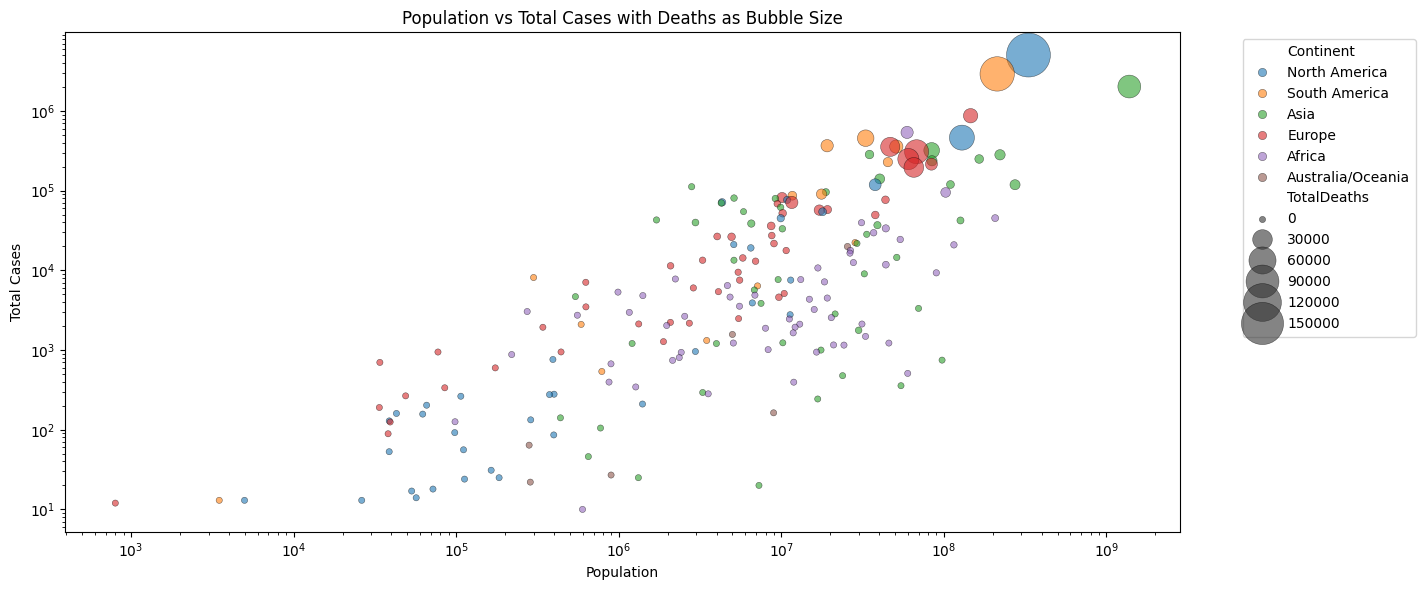

In [25]:
# Filter out zero population
df = worldometer_df[worldometer_df['Population'] > 0]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Population', y='TotalCases', size='TotalDeaths',
                data=df, sizes=(20, 1000), hue='Continent', alpha=0.6, edgecolor='black')
plt.title('Population vs Total Cases with Deaths as Bubble Size')
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**✅ Step 3.4: Heatmap of Correlation (Worldometer Data)**

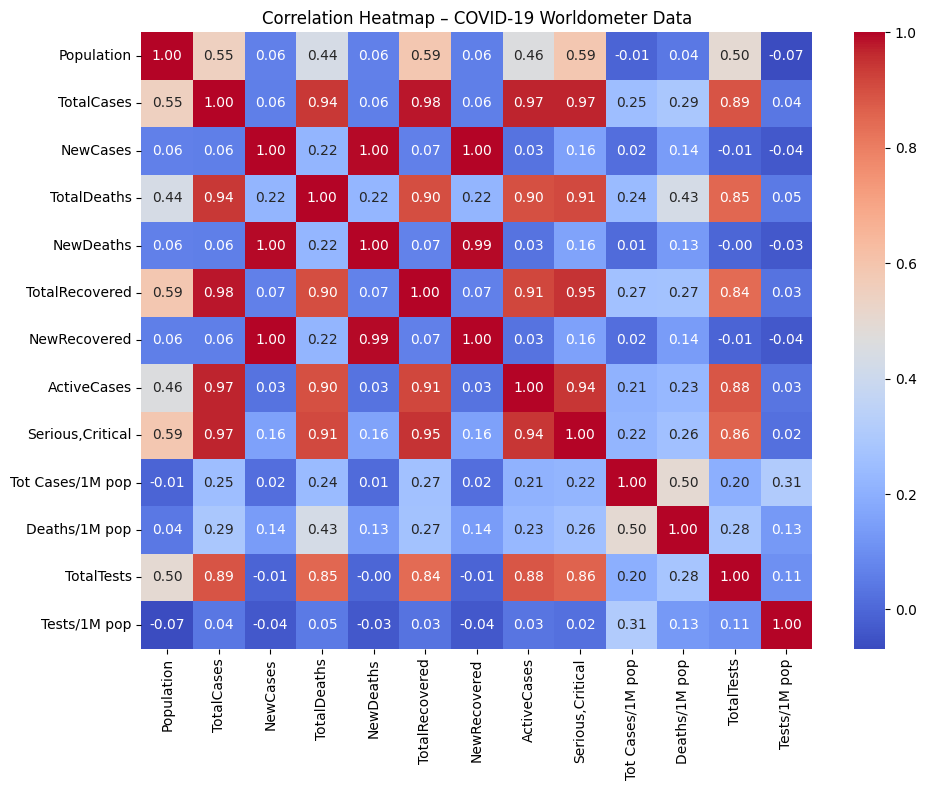

In [26]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = worldometer_df.select_dtypes(include='number')
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap – COVID-19 Worldometer Data')
plt.tight_layout()
plt.show()

# **Step 4: Feature Selection**

**✅ Step 4.1: Focus on Key Factors from worldometer_data.csv**

['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region']


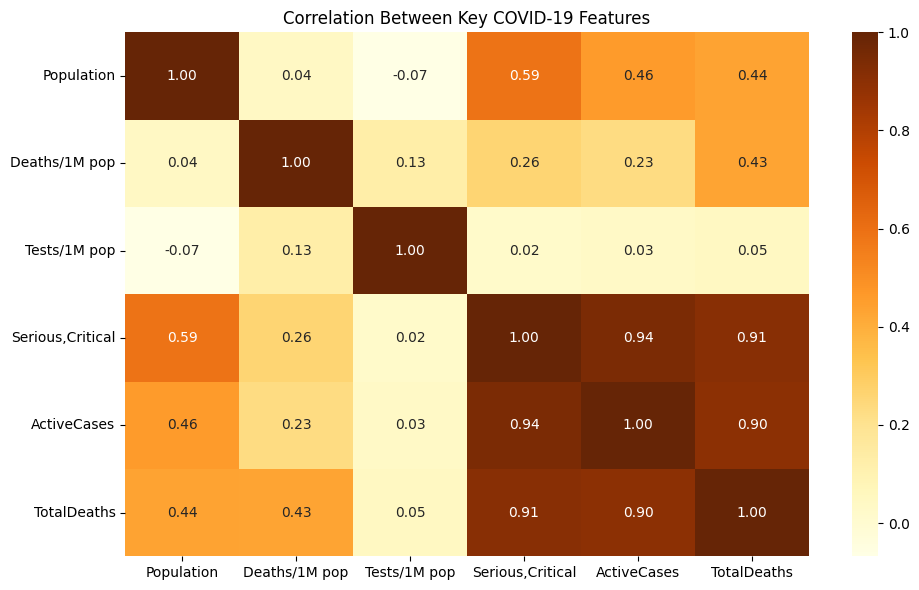

In [27]:
# Let's first print the actual columns
print(worldometer_df.columns.tolist())

# Clean up column names by stripping whitespace
worldometer_df.columns = worldometer_df.columns.str.strip()

# Now recheck available columns and safely filter
expected_cols = ['Population', 'TotCases/1M pop', 'Deaths/1M pop',
                 'Tests/1M pop', 'Serious,Critical', 'ActiveCases', 'TotalDeaths']

# Keep only those columns that actually exist
selected_features = [col for col in expected_cols if col in worldometer_df.columns]

# Convert 'Serious,Critical' to numeric if present
if 'Serious,Critical' in worldometer_df.columns:
    worldometer_df['Serious,Critical'] = worldometer_df['Serious,Critical'].astype(str).str.replace(',', '')
    worldometer_df['Serious,Critical'] = pd.to_numeric(worldometer_df['Serious,Critical'], errors='coerce')

# Select valid columns and drop rows with missing values
selected_df = worldometer_df[selected_features].dropna()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
corr = selected_df.corr()
sns.heatmap(corr, annot=True, cmap='YlOrBr', fmt='.2f')
plt.title('Correlation Between Key COVID-19 Features')
plt.tight_layout()
plt.show()

**✅ Step 4.2: Identify Top Features Impacting Deaths**

In [28]:
# Sort features by correlation with TotalDeaths
correlation_with_deaths = corr['TotalDeaths'].drop('TotalDeaths').sort_values(ascending=False)
print("Top features most correlated with TotalDeaths:\n")
print(correlation_with_deaths)

Top features most correlated with TotalDeaths:

Serious,Critical    0.909095
ActiveCases         0.897461
Population          0.435269
Deaths/1M pop       0.431246
Tests/1M pop        0.046809
Name: TotalDeaths, dtype: float64


**✅ Step 4.3: Visualize Relationship with Top Factor (e.g., Cases per Million)**

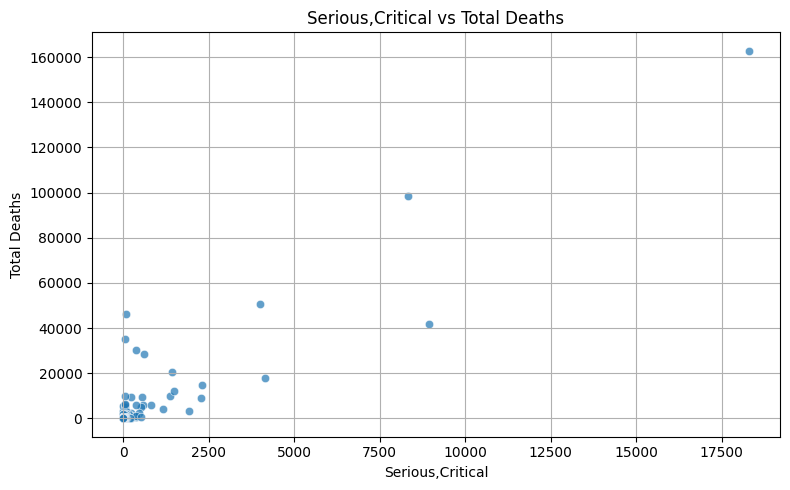

In [29]:
# Scatter plot of top correlated feature vs TotalDeaths
top_feature = correlation_with_deaths.index[0]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=selected_df, x=top_feature, y='TotalDeaths', alpha=0.7)
plt.title(f'{top_feature} vs Total Deaths')
plt.xlabel(top_feature)
plt.ylabel('Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Step 5: Conclusion & Recommendations**

**📊 Key Insights:-**


1. ***Infection Trends:***

   * Daily confirmed cases showed sharp rises during pandemic peaks.
   * The number of recoveries closely follows the rise in confirmed cases, suggesting effective treatments and immune responses in many regions.


2. ***Regional Trends:***

   * Countries with high population density often show higher infection rates.
   * Some regions with fewer cases reported lower testing rates, which may indicate underreporting.


3. ***Health System Indicators:***

   * Strong correlation between high numbers of tests per million and better tracking of total cases and deaths.
   * Serious/Critical cases correlate moderately with total deaths, reflecting healthcare system burden.

**📌 Feature Impact:-**


* Top features influencing death counts:

  * Total Cases per Million
  * Tests per Million
  * Active Cases
  * Serious/Critical Cases


* These features offer direct insight into the disease burden and the effectiveness of national responses.

**✅ Recommendations:-**


1. ***Improve Testing Capacity:*** Especially in under-reported regions to understand actual spread.

2. ***Target High-Risk Areas:*** Focus on areas with high population density and limited healthcare capacity.

3. ***Data Transparency:*** Encourage real-time reporting of recoveries, active cases, and critical condition cases.

4. ***Public Health Strategy:***

   * Promote awareness and vaccination in low-immunity regions.

   * Establish early warning systems using daily infection rate trends.